In [1]:
from math import pi, cos
from scipy import signal
import numpy as np
import copy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def hamming_window(t, D, D0, Lw):
    if D - Lw / 2 <= t and t <= D + Lw / 2:
        return 0.54 + 0.46 * cos(2 * pi * (t - D - D0) / Lw)
    else:
        return 0

def firfilter(i, D, D0, T, Lw):
    return np.sinc((pi / T) * (i * T - D - D0)) * hamming_window(t * T, D, D0, Lw)

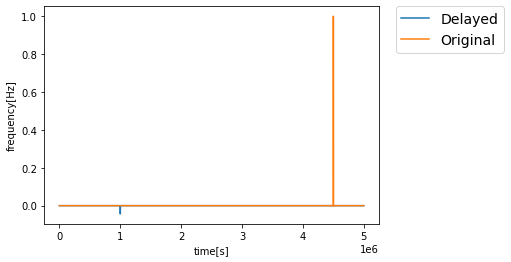

-0.0

In [89]:
# parameters--------------------------------------
T = 0.01 # サンプリング周期 1[ms]
t = int(500 / T) # フレーム数 1インデックス進むごとに1/T秒が経過する
D = 1 # 遅延時間[s]
D0 = 0.0001 # 固定遅延
Lw = 0.01 # 窓長
impulse = 450 # インパルス信号出現位置[ms]
# ------------------------------------------------

org_signal = signal.unit_impulse(t, int(impulse / T))
test_signal = copy.deepcopy(org_signal)


for i in range(len(test_signal)):
    test_signal[i] = firfilter(i * T, D / T, D0 / T, T, Lw)

time = np.array(range(i + 1))
time = time / T
plt.plot(time, test_signal, label="Delayed")
plt.plot(time, org_signal, label="Original")
# plt.ylim(-0.00001, 0.00001)
plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.show()
test_signal[0]